In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
import seaborn as sns

In [18]:
# CSV dosyasÄ±nÄ± oku
df = pd.read_csv("deprem_verisi.csv")

In [19]:
df.describe()

No   Deprem Kodu        Enlem       Boylam  derinlik_km  \
count  2623.000000  2.623000e+03  2623.000000  2623.000000  2623.000000   
mean   1312.000000  1.996219e+13    40.672787    32.818044    10.900877   
std     757.339202  2.028979e+11     0.394793     5.269624    10.957189   
min       1.000000  1.931073e+13    40.000000    26.000000     0.000000   
25%     656.500000  1.984033e+13    40.400000    28.790000     5.000000   
50%    1312.000000  1.999111e+13    40.690000    31.291200     9.000000   
75%    1967.500000  2.011073e+13    40.845000    35.330000    12.000000   
max    2623.000000  2.025063e+13    41.998200    44.999000   100.000000   

                xM           MD           ML          Mw           Ms  \
count  2623.000000  2623.000000  2623.000000  882.000000  2623.000000   
mean      4.031910     2.141555     1.932368    4.031066     0.657110   
std       0.578577     2.044732     2.090982    1.221464     1.648473   
min       3.500000     0.000000     0.000000    0.000000     0.000000   
25%       3.600000     0.000000     0.000000    3.700000     0.000000   
50%       3.800000     3.500000     0.000000    4.100000     0.000000   
75%       4.300000     3.900000     3.900000    4.700000     0.000000   
max       7.500000     6.700000     7.000000    7.500000     7.200000   

                Mb  
count  2623.000000  
mean      1.319520  
std       2.027639  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       3.700000  
max       6.600000

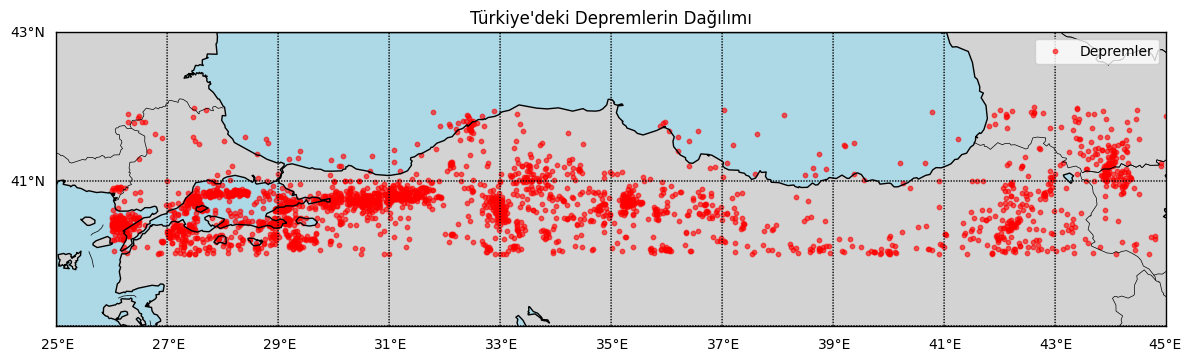

In [20]:
# Harita sÄ±nÄ±rlarÄ± (TÃ¼rkiye'ye odaklanalÄ±m)
lon_min, lon_max = 25, 45
lat_min, lat_max = 39, 43

# HaritayÄ± oluÅŸtur
plt.figure(figsize=(12, 8))
m = Basemap(projection='merc', 
            llcrnrlon=lon_min, llcrnrlat=lat_min, 
            urcrnrlon=lon_max, urcrnrlat=lat_max,
            resolution='i')

# Harita bileÅŸenleri
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgray', lake_color='lightblue')
m.drawparallels(range(35, 44, 2), labels=[1,0,0,0])
m.drawmeridians(range(25, 46, 2), labels=[0,0,0,1])

# Deprem koordinatlarÄ±nÄ± haritaya dÃ¶nÃ¼ÅŸtÃ¼r
x, y = m(df["Boylam"].values, df["Enlem"].values)

# Depremleri Ã§iz (bÃ¼yÃ¼klÃ¼ÄŸe gÃ¶re renkli veya boyutlu yapabilirsin)
m.scatter(x, y, s=10, c='red', alpha=0.6, label="Depremler")

# BaÅŸlÄ±k ve gÃ¶sterge
plt.title("TÃ¼rkiye'deki Depremlerin DaÄŸÄ±lÄ±mÄ±")
plt.legend()
plt.tight_layout()
plt.show()


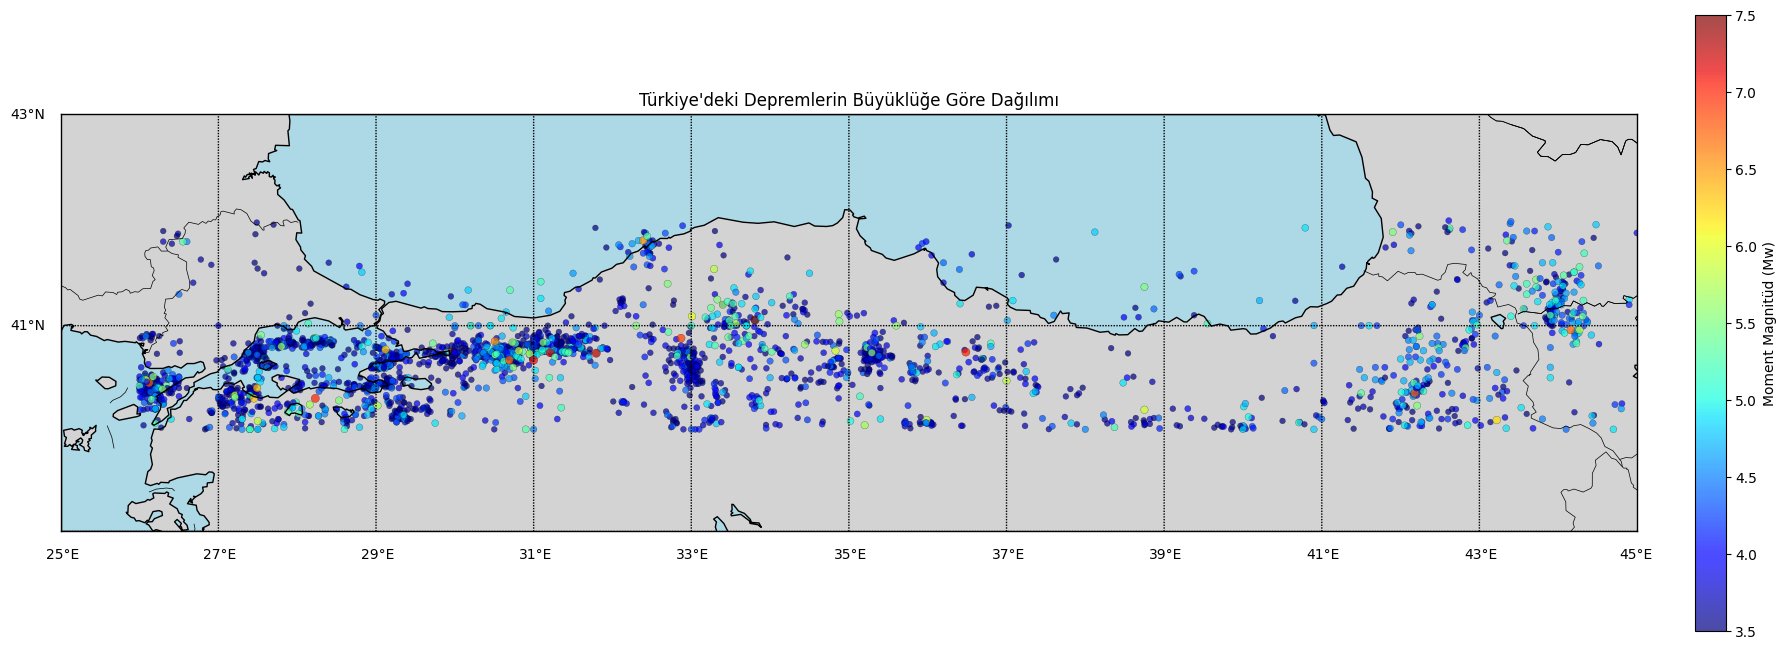

In [21]:
# Mw deÄŸeri olmayanlarÄ± filtrele (NaN olanlar hata verir)
df = df[df["xM"].notna()]

# Harita sÄ±nÄ±rlarÄ±
lon_min, lon_max = 25, 45
lat_min, lat_max = 39, 43

# HaritayÄ± baÅŸlat
plt.figure(figsize=(20, 8))
m = Basemap(projection='merc', 
            llcrnrlon=lon_min, llcrnrlat=lat_min, 
            urcrnrlon=lon_max, urcrnrlat=lat_max,
            resolution='i')

# Harita detaylarÄ±
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgray', lake_color='lightblue')
m.drawparallels(range(35, 44, 2), labels=[1,0,0,0])
m.drawmeridians(range(25, 46, 2), labels=[0,0,0,1])

# Koordinat dÃ¶nÃ¼ÅŸÃ¼mÃ¼
x, y = m(df["Boylam"].values, df["Enlem"].values)

# Scatter plot: renk = Mw, bÃ¼yÃ¼klÃ¼k = Mw * 3
sc = m.scatter(x, y, c=df["xM"], cmap="jet", s=df["xM"]*5, alpha=0.7, edgecolors='k', linewidths=0.2)

# Colorbar
cbar = plt.colorbar(sc, shrink=0.8, pad=0.03)
cbar.set_label("Moment MagnitÃ¼d (Mw)")

# BaÅŸlÄ±k
plt.title("TÃ¼rkiye'deki Depremlerin BÃ¼yÃ¼klÃ¼ÄŸe GÃ¶re DaÄŸÄ±lÄ±mÄ±")
plt.tight_layout()
plt.show()

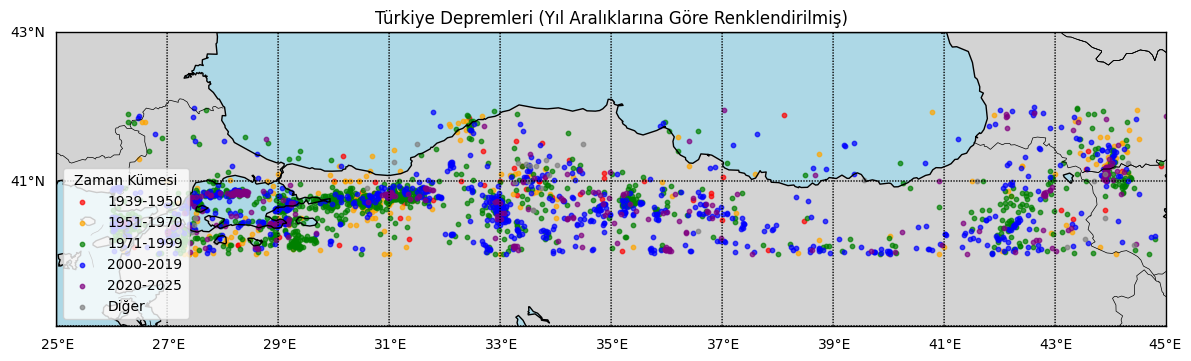

In [22]:
# GeÃ§erli Mw ve tarih bilgisi olanlarÄ± al
df = df[df["xM"].notna() & df["Tarih"].notna()]

# Tarih kolonu datetime'e Ã§evir
df["Tarih"] = pd.to_datetime(df["Tarih"], errors='coerce')

# YÄ±l bilgisini Ã§Ä±kar
df["Yil"] = df["Tarih"].dt.year

# KÃ¼meleri tanÄ±mla
def yÄ±l_kÃ¼mesi(y):
    if 1939 <= y <= 1950:
        return "1939-1950"
    elif 1951 <= y <= 1970:
        return "1951-1970"
    elif 1971 <= y <= 1999:
        return "1971-1999"
    elif 2000 <= y <= 2019:
        return "2000-2019"
    elif 2020 <= y <= 2025:
        return "2020-2025"
    else:
        return "DiÄŸer"

df["zaman_kÃ¼mesi"] = df["Yil"].apply(lambda y: yÄ±l_kÃ¼mesi(y) if pd.notna(y) else "Bilinmiyor")

# Harita ayarlarÄ±
plt.figure(figsize=(12, 8))
m = Basemap(projection='merc', llcrnrlon=25, llcrnrlat=39, urcrnrlon=45, urcrnrlat=43, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgray', lake_color='lightblue')
m.drawparallels(range(35, 44, 2), labels=[1,0,0,0])
m.drawmeridians(range(25, 46, 2), labels=[0,0,0,1])

# Renk paleti
colors = {
    "1939-1950": "red",
    "1951-1970": "orange",
    "1971-1999": "green",
    "2000-2019": "blue",
    "2020-2025": "purple",
    "DiÄŸer": "gray"
}

# Her kÃ¼me iÃ§in ayrÄ± Ã§izim
for cluster, group in df.groupby("zaman_kÃ¼mesi"):
    x, y = m(group["Boylam"].values, group["Enlem"].values)
    m.scatter(x, y, s=10, color=colors.get(cluster, "gray"), label=cluster, alpha=0.7)

# BaÅŸlÄ±k ve legend
plt.title("TÃ¼rkiye Depremleri (YÄ±l AralÄ±klarÄ±na GÃ¶re RenklendirilmiÅŸ)")
plt.legend(title="Zaman KÃ¼mesi", loc='lower left')
plt.tight_layout()
plt.show()

### ðŸ“Œ Ã–nerilen Zaman AralÄ±klarÄ± (LiteratÃ¼rden Ä°lhamla)

Kuzey Anadolu FayÄ±â€™ndaki tarihsel kÄ±rÄ±lmalar dikkate alÄ±narak deprem verileri ÅŸu zaman kÃ¼melerine ayrÄ±labilir:

| KÃ¼me AdÄ± | YÄ±l AralÄ±ÄŸÄ±  | AÃ§Ä±klama                  |
|----------|--------------|---------------------------|
| `grp1`   | 1939â€“1950     | Erzincan, Tokat           |
| `grp2`   | 1951â€“1970     | Bolu, AdapazarÄ±           |
| `grp3`   | 1971â€“1999     | DÃ¼zce, Ä°zmit              |
| `grp4`   | 2000â€“2019     | Marmara sessizliÄŸi        |
| `grp5`   | 2020â€“2025     | OlasÄ± gelecektekiler      |


In [23]:
# Tarihleri datetime formatÄ±na Ã§evir
df["Tarih"] = pd.to_datetime(df["Tarih"], errors="coerce")

# YÄ±l ve ay gibi sÃ¼tunlarÄ± Ã§Ä±kar
df["Yil"] = df["Tarih"].dt.year
df["Ay"] = df["Tarih"].dt.month

# En yaygÄ±n bÃ¼yÃ¼klÃ¼k Ã¶lÃ§Ã¼sÃ¼ olarak Mw seÃ§elim
df_mw = df[df["xM"].notna()]

# Genel istatistiksel Ã¶zet
istatistikler = {
    "Toplam deprem sayÄ±sÄ±": len(df),
    "xM deÄŸeri olan deprem sayÄ±sÄ±": len(df_mw),
    "Minimum xM": df_mw["xM"].min(),
    "Ortalama xM": df_mw["xM"].mean(),
    "Medyan xM": df_mw["xM"].median(),
    "Maksimum xM": df_mw["xM"].max(),
    "Ortalama derinlik (km)": df["derinlik_km"].mean(),
    "En derin deprem (km)": df["derinlik_km"].max(),
    "En sÄ±ÄŸ deprem (km)": df["derinlik_km"].min(),
    "Tarihi bilinen en eski deprem": df["Tarih"].min(),
    "Tarihi bilinen en yeni deprem": df["Tarih"].max(),
    "FarklÄ± yerleÅŸim sayÄ±sÄ±": df["Yer"].nunique()
}

# Sonucu gÃ¶ster
for k, v in istatistikler.items():
    print(f"{k}: {v}")

Toplam deprem sayÄ±sÄ±: 2623
xM deÄŸeri olan deprem sayÄ±sÄ±: 2623
Minimum xM: 3.5
Ortalama xM: 4.031910026687
Medyan xM: 3.8
Maksimum xM: 7.5
Ortalama derinlik (km): 10.900876858558902
En derin deprem (km): 100.0
En sÄ±ÄŸ deprem (km): 0.0
Tarihi bilinen en eski deprem: 1931-07-31 00:00:00
Tarihi bilinen en yeni deprem: 2025-06-29 00:00:00
FarklÄ± yerleÅŸim sayÄ±sÄ±: 2008


---

In [24]:
# Tarih ve Mw verisi olanlarÄ± filtrele
df_clean = df[df["Tarih"].notna() & df["Boylam"].notna()]

# Gerekli sÃ¼tunlar
df_clean = df_clean[["Tarih", "Boylam", "Enlem", "xM"]]
df_clean["Yil"] = df_clean["Tarih"].dt.year

# Sadece Kuzey Anadolu FayÄ±'na odaklanmak istersek (Ã¶rnek alan)
# df_clean = df_clean[(df_clean["enlem"] >= 39) & (df_clean["enlem"] <= 41.5) & 
#                     (df_clean["boylam"] >= 27) & (df_clean["boylam"] <= 40)]

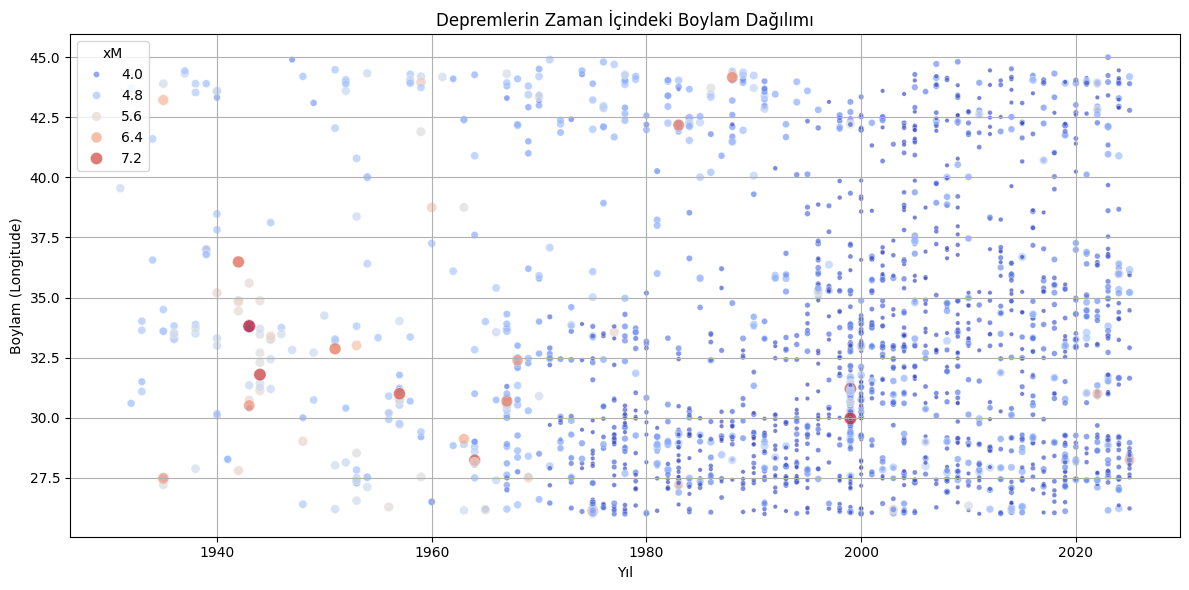

In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean, x="Yil", y="Boylam", hue="xM", palette="coolwarm", size="xM", sizes=(10, 80), alpha=0.7)
plt.title("Depremlerin Zaman Ä°Ã§indeki Boylam DaÄŸÄ±lÄ±mÄ±")
plt.xlabel("YÄ±l")
plt.ylabel("Boylam (Longitude)")
plt.legend(title="xM")
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
# Sadece tarih, boylam ve mag bilgisi olanlarÄ± al
df_clean = df[df["Tarih"].notna() & df["Boylam"].notna() & df["xM"].notna()]

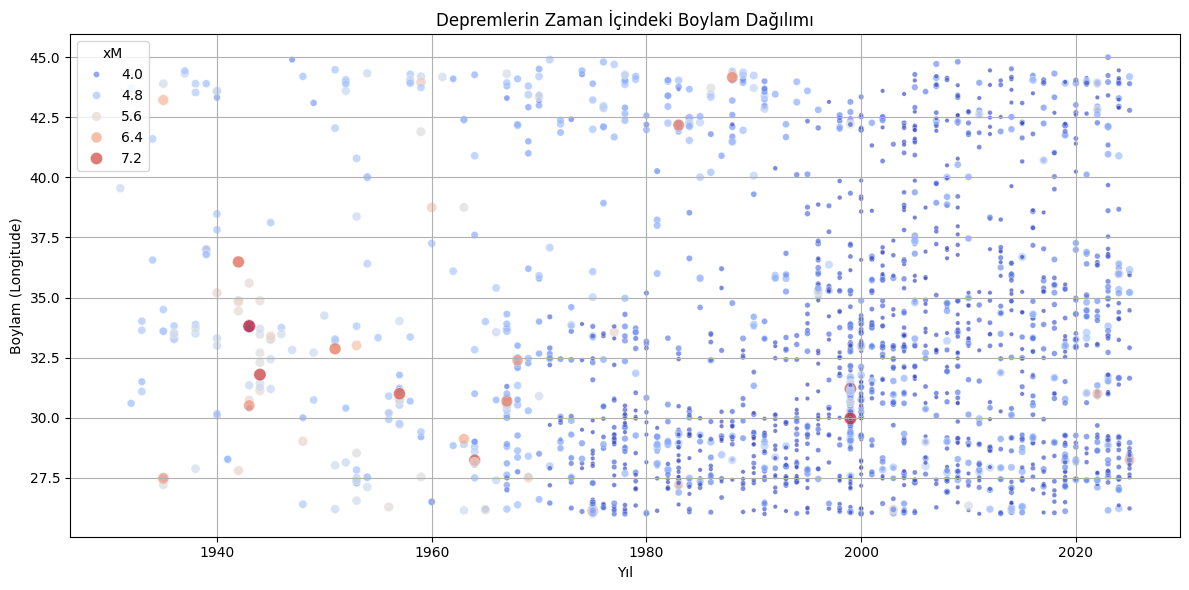

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean, x="Yil", y="Boylam", hue="xM", size="xM",
                palette="coolwarm", sizes=(10, 80), alpha=0.7, legend="brief")

plt.title("Depremlerin Zaman Ä°Ã§indeki Boylam DaÄŸÄ±lÄ±mÄ±")
plt.xlabel("YÄ±l")
plt.ylabel("Boylam (Longitude)")
plt.grid(True)
plt.tight_layout()
plt.show()


Lineer regresyon eÄŸimi: 0.0063


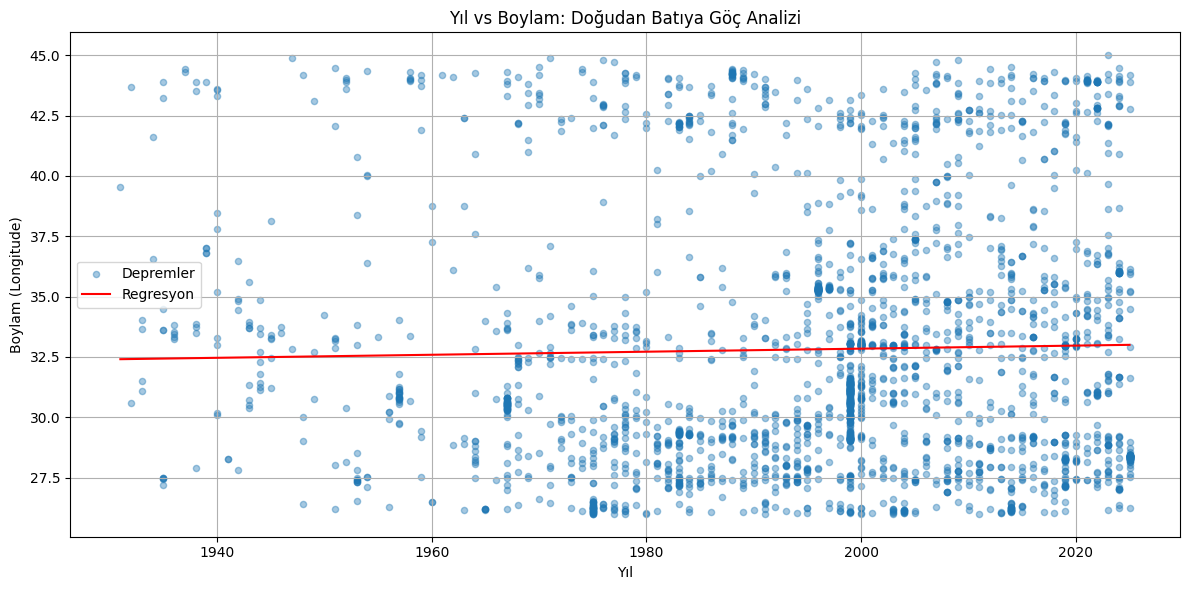

In [28]:
from sklearn.linear_model import LinearRegression
import numpy as np

# NaN iÃ§ermeyenleri al
data = df_clean.dropna(subset=["Yil", "Boylam"])
X = data["Yil"].values.reshape(-1, 1)
y = data["Boylam"].values

# Modeli eÄŸit
model = LinearRegression()
model.fit(X, y)

# Regresyon eÄŸimi
eÄŸim = model.coef_[0]
print(f"Lineer regresyon eÄŸimi: {eÄŸim:.4f}")

# Tahmin Ã§izgisi
y_pred = model.predict(X)

# Grafik
plt.figure(figsize=(12,6))
plt.scatter(data["Yil"], data["Boylam"], alpha=0.4, label="Depremler", s=20)
plt.plot(data["Yil"], y_pred, color='red', label="Regresyon")
plt.title("YÄ±l vs Boylam: DoÄŸudan BatÄ±ya GÃ¶Ã§ Analizi")
plt.xlabel("YÄ±l")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


EÄŸim (slope): 0.0063
RÂ² skoru: 0.0006


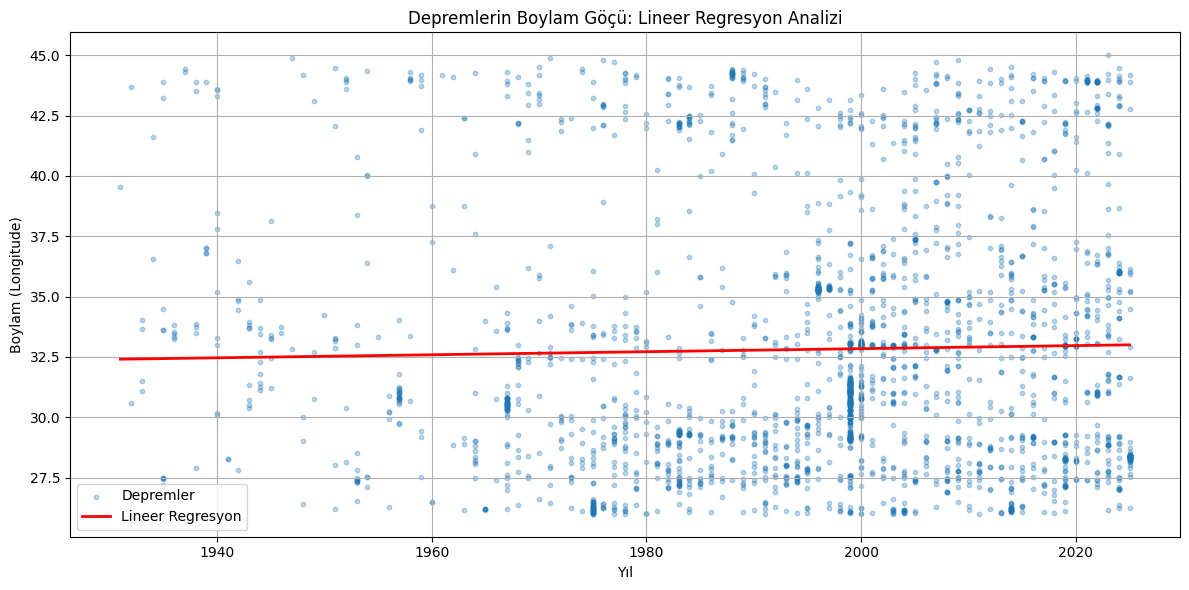

In [29]:
# Girdi ve Ã§Ä±ktÄ±
X = df_clean["Yil"].values.reshape(-1, 1)
y = df_clean["Boylam"].values

# Modeli eÄŸit
model = LinearRegression()
model.fit(X, y)

# EÄŸim ve RÂ² deÄŸeri
eÄŸim = model.coef_[0]
r2 = model.score(X, y)

print(f"EÄŸim (slope): {eÄŸim:.4f}")
print(f"RÂ² skoru: {r2:.4f}")

# Tahmin Ã§izgisi
y_pred = model.predict(X)

# Grafik
plt.figure(figsize=(12, 6))
plt.scatter(df_clean["Yil"], df_clean["Boylam"], alpha=0.3, s=10, label="Depremler")
plt.plot(df_clean["Yil"], y_pred, color='red', label="Lineer Regresyon", linewidth=2)
plt.title("Depremlerin Boylam GÃ¶Ã§Ã¼: Lineer Regresyon Analizi")
plt.xlabel("YÄ±l")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Depremler (â‰¥5.0)

In [30]:
# Sadece >=5.0 bÃ¼yÃ¼klÃ¼kte olanlarÄ± al
df_big = df[(df["Tarih"].notna()) & (df["Boylam"].notna()) & (df["xM"].notna()) & (df["xM"] >= 5.0)]

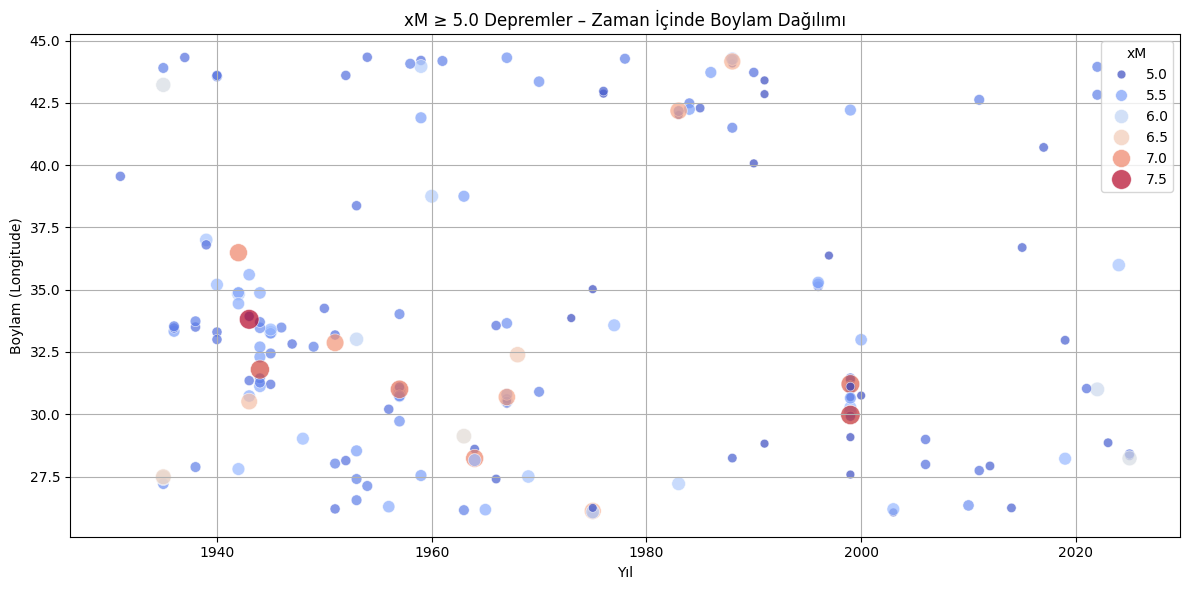

In [31]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_big, x="Yil", y="Boylam", hue="xM", size="xM",
                palette="coolwarm", sizes=(40, 200), alpha=0.7, legend="brief")

plt.title("xM â‰¥ 5.0 Depremler â€“ Zaman Ä°Ã§inde Boylam DaÄŸÄ±lÄ±mÄ±")
plt.xlabel("YÄ±l")
plt.ylabel("Boylam (Longitude)")
plt.grid(True)
plt.tight_layout()
plt.show()

Lineer regresyon eÄŸimi: -0.0061
RÂ² skoru: 0.0008


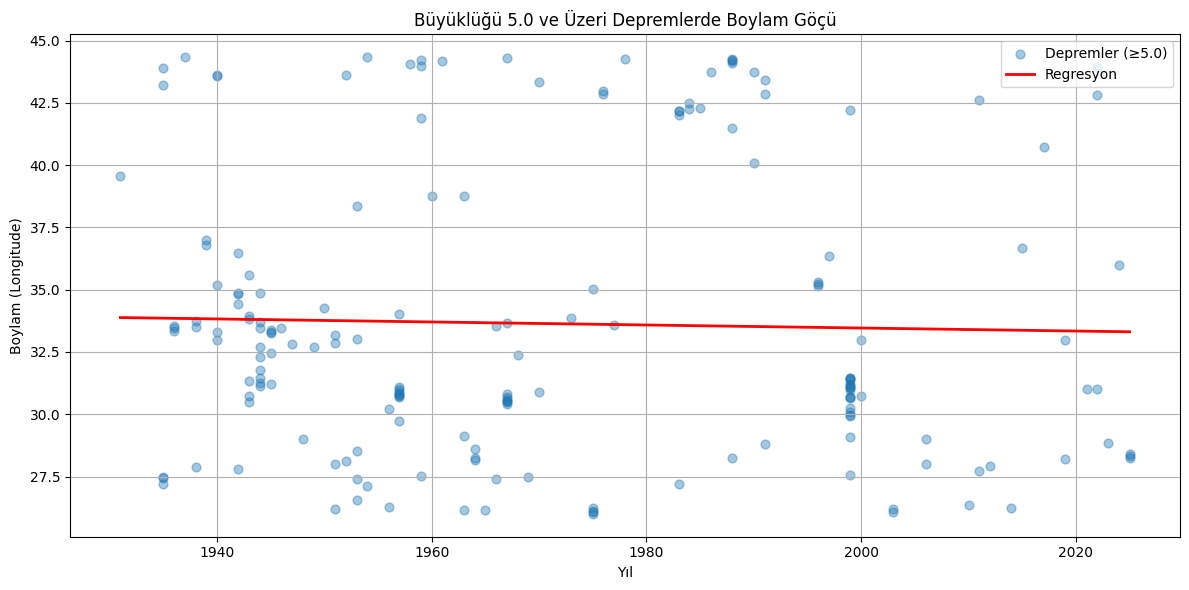

In [32]:
# Girdi ve Ã§Ä±ktÄ±
X = df_big["Yil"].values.reshape(-1, 1)
y = df_big["Boylam"].values

# Model
model = LinearRegression()
model.fit(X, y)

# EÄŸim ve RÂ²
slope = model.coef_[0]
r2 = model.score(X, y)

print(f"Lineer regresyon eÄŸimi: {slope:.4f}")
print(f"RÂ² skoru: {r2:.4f}")

# Tahmin Ã§izgisi
y_pred = model.predict(X)

# Grafik
plt.figure(figsize=(12, 6))
plt.scatter(df_big["Yil"], df_big["Boylam"], alpha=0.4, s=40, label="Depremler (â‰¥5.0)")
plt.plot(df_big["Yil"], y_pred, color="red", label="Regresyon", linewidth=2)
plt.title("BÃ¼yÃ¼klÃ¼ÄŸÃ¼ 5.0 ve Ãœzeri Depremlerde Boylam GÃ¶Ã§Ã¼")
plt.xlabel("YÄ±l")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Depremler (â‰¥6.0)

In [34]:
# Sadece >=6.0 bÃ¼yÃ¼klÃ¼kte olanlarÄ± al
df_6 = df[(df["Tarih"].notna()) & (df["Boylam"].notna()) & (df["xM"].notna()) & (df["xM"] >= 6.0)]

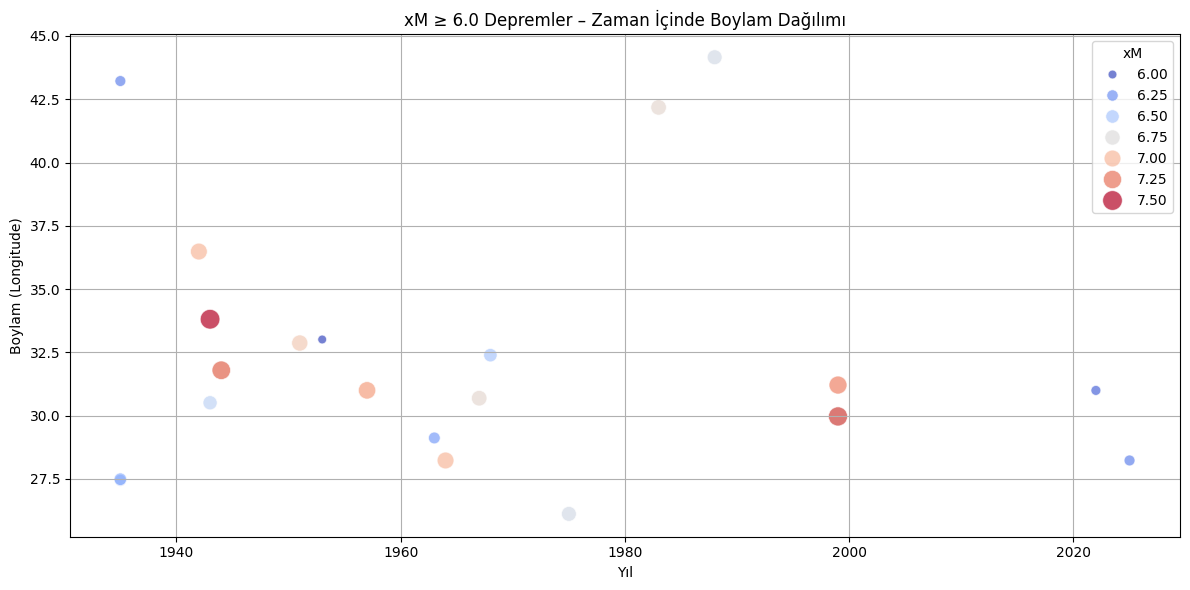

In [35]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_6, x="Yil", y="Boylam", hue="xM", size="xM",
                palette="coolwarm", sizes=(40, 200), alpha=0.7, legend="brief")

plt.title("xM â‰¥ 6.0 Depremler â€“ Zaman Ä°Ã§inde Boylam DaÄŸÄ±lÄ±mÄ±")
plt.xlabel("YÄ±l")
plt.ylabel("Boylam (Longitude)")
plt.grid(True)
plt.tight_layout()
plt.show()

Lineer regresyon eÄŸimi: -0.0109
RÂ² skoru: 0.0034


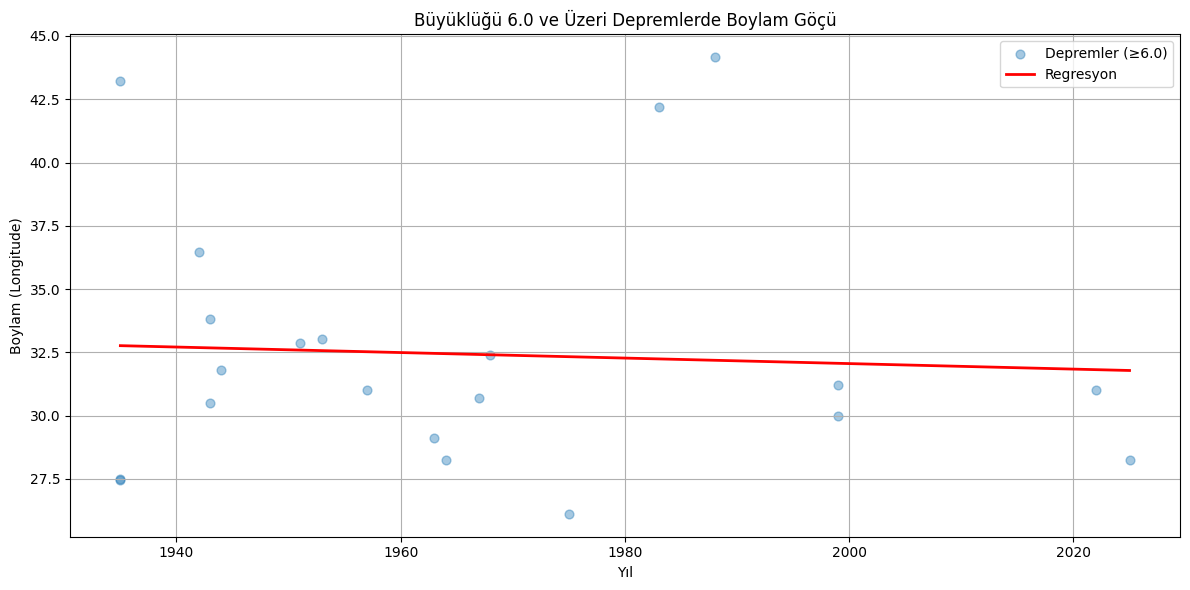

In [36]:
# Girdi ve Ã§Ä±ktÄ±
X = df_6["Yil"].values.reshape(-1, 1)
y = df_6["Boylam"].values

# Model
model = LinearRegression()
model.fit(X, y)

# EÄŸim ve RÂ²
slope = model.coef_[0]
r2 = model.score(X, y)

print(f"Lineer regresyon eÄŸimi: {slope:.4f}")
print(f"RÂ² skoru: {r2:.4f}")

# Tahmin Ã§izgisi
y_pred = model.predict(X)

# Grafik
plt.figure(figsize=(12, 6))
plt.scatter(df_6["Yil"], df_6["Boylam"], alpha=0.4, s=40, label="Depremler (â‰¥6.0)")
plt.plot(df_6["Yil"], y_pred, color="red", label="Regresyon", linewidth=2)
plt.title("BÃ¼yÃ¼klÃ¼ÄŸÃ¼ 6.0 ve Ãœzeri Depremlerde Boylam GÃ¶Ã§Ã¼")
plt.xlabel("YÄ±l")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
buyuk_yillar = [1939, 1942, 1943, 1944, 1951, 1957, 1967, 1971, 1992, 1949, 1966]

df_buyuk = df_big[df_big["Yil"].isin(buyuk_yillar)].copy()


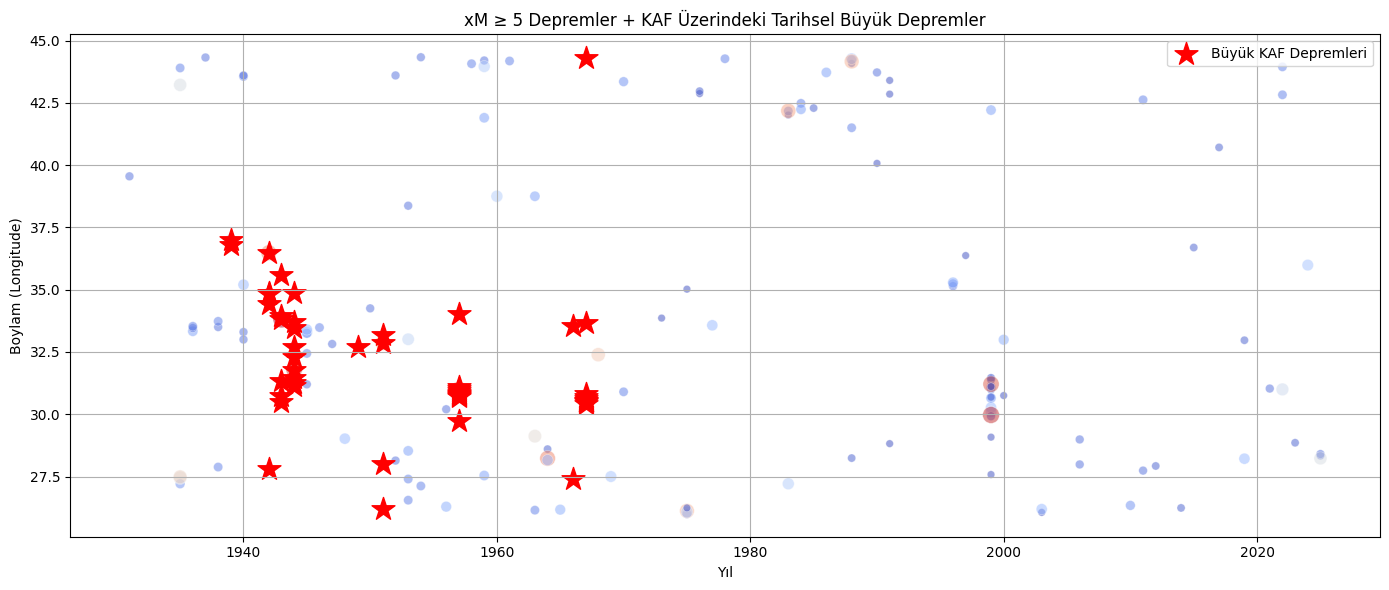

In [38]:
plt.figure(figsize=(14, 6))

# TÃ¼m 5+ depremleri gÃ¶ster
sns.scatterplot(data=df_big, x="Yil", y="Boylam", hue="xM", palette="coolwarm", size="xM", sizes=(30, 150), alpha=0.5, legend=False)

# BÃ¼yÃ¼k depremleri kÄ±rmÄ±zÄ± yÄ±ldÄ±zla gÃ¶ster
plt.scatter(df_buyuk["Yil"], df_buyuk["Boylam"], color="red", marker="*", s=300, label="BÃ¼yÃ¼k KAF Depremleri")

plt.title("xM â‰¥ 5 Depremler + KAF Ãœzerindeki Tarihsel BÃ¼yÃ¼k Depremler")
plt.xlabel("YÄ±l")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
X_big_eq = df_buyuk["Yil"].values.reshape(-1, 1)
y_big_eq = df_buyuk["Boylam"].values

model_big_eq = LinearRegression()
model_big_eq.fit(X_big_eq, y_big_eq)

slope_big = model_big_eq.coef_[0]
r2_big = model_big_eq.score(X_big_eq, y_big_eq)

print(f"BÃ¼yÃ¼k depremler regresyon eÄŸimi: {slope_big:.4f}")
print(f"RÂ²: {r2_big:.4f}")

BÃ¼yÃ¼k depremler regresyon eÄŸimi: -0.0673
RÂ²: 0.0508


In [40]:
# Ã–nce bÃ¼yÃ¼k depremler dataframe'ini yÄ±l sÄ±rasÄ±na gÃ¶re sÄ±rala
df_buyuk_sorted = df_buyuk.sort_values(by="Yil").reset_index(drop=True)

# Fark sÃ¼tunlarÄ±nÄ± hesapla
df_buyuk_sorted["yÄ±l_farkÄ±"] = df_buyuk_sorted["Yil"].diff()
df_buyuk_sorted["boylam_farkÄ±"] = df_buyuk_sorted["Boylam"].diff()


In [29]:
# Ä°ncelenecek sÃ¼tunlarÄ± seÃ§
cols = ["Tarih", "mag", "Boylam", "Enlem", "yÄ±l_farkÄ±", "boylam_farkÄ±"]
print(df_buyuk_sorted[cols])


        Tarih  mag   Boylam    Enlem  yÄ±l_farkÄ±  boylam_farkÄ±
0  1939-12-27  5.2  36.8000  40.8300        NaN           NaN
1  1939-12-28  5.8  37.0000  40.4700        0.0        0.2000
2  1942-11-21  5.6  34.4400  40.8200        3.0       -2.5600
3  1942-12-02  5.5  34.8800  41.0400        0.0        0.4400
4  1942-12-11  5.9  34.8300  40.7600        0.0       -0.0500
5  1942-12-20  7.0  36.4840  40.7470        0.0        1.6540
6  1942-06-16  5.7  27.8000  40.8000        0.0       -8.6840
7  1943-06-20  6.4  30.5100  40.8500        1.0        2.7100
8  1943-06-20  5.6  30.7300  40.8400        0.0        0.2200
9  1943-09-06  5.2  31.3500  40.2100        0.0        0.6200
10 1943-11-26  7.5  33.8098  41.0537        0.0        2.4598
11 1943-11-27  5.2  33.9300  40.7800        0.0        0.1202
12 1944-10-18  5.4  33.4700  40.8900        1.0       -0.4600
13 1944-09-30  5.6  34.8700  41.1100        0.0        1.4000
14 1944-04-05  5.6  31.1200  40.8400        0.0       -3.7500
15 19

In [41]:
df_buyuk_sorted["uzaysal_fark_km"] = df_buyuk_sorted["boylam_farkÄ±"].abs() * 85


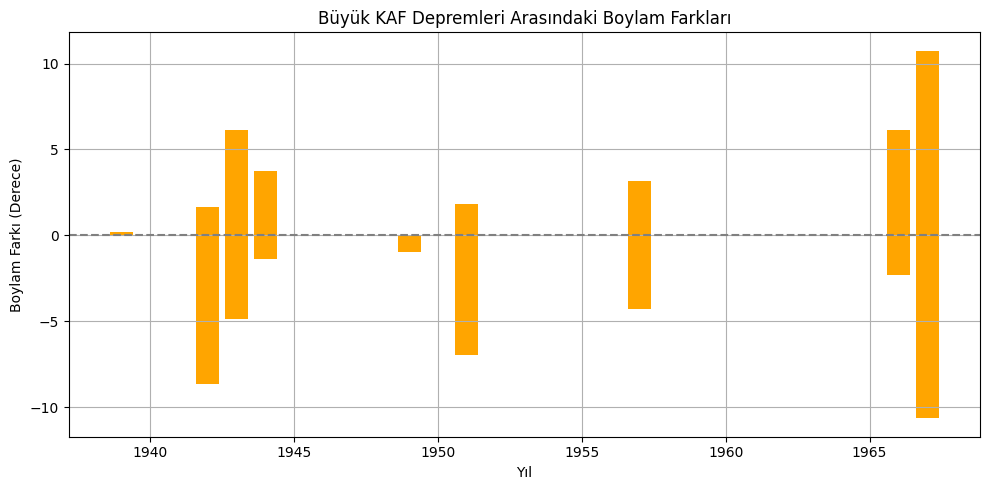

In [42]:
plt.figure(figsize=(10,5))
plt.bar(df_buyuk_sorted["Yil"], df_buyuk_sorted["boylam_farkÄ±"], color='orange')
plt.axhline(0, color='gray', linestyle='--')
plt.title("BÃ¼yÃ¼k KAF Depremleri ArasÄ±ndaki Boylam FarklarÄ±")
plt.xlabel("YÄ±l")
plt.ylabel("Boylam FarkÄ± (Derece)")
plt.grid(True)
plt.tight_layout()
plt.show()


# MODEL

In [43]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Tarih dÃ¶nÃ¼ÅŸÃ¼mÃ¼
df["Tarih"] = pd.to_datetime(df["Tarih"], errors="coerce")

# YÄ±l sÄ±rasÄ±na gÃ¶re Mw â‰¥ 6 depremler
df_6plus = df[df["xM"] >= 6.0].dropna(subset=["Tarih", "Boylam"])
df_6plus = df_6plus.sort_values("Tarih").reset_index(drop=True)

# Zamansal X: her depremi bir sÄ±raya koy
df_6plus["time_index"] = np.arange(len(df_6plus))

# X = time, y = boylam
X = df_6plus["time_index"].values.reshape(-1, 1)
y = df_6plus["Boylam"].values.reshape(-1, 1)

# Normalize et (opsiyonel)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)


In [44]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# SVR modeli
model = SVR(kernel='rbf', C=100, epsilon=0.01)
model.fit(X, y_scaled.ravel())

# Tahminler
X_pred = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_pred_scaled = model.predict(X_pred)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))


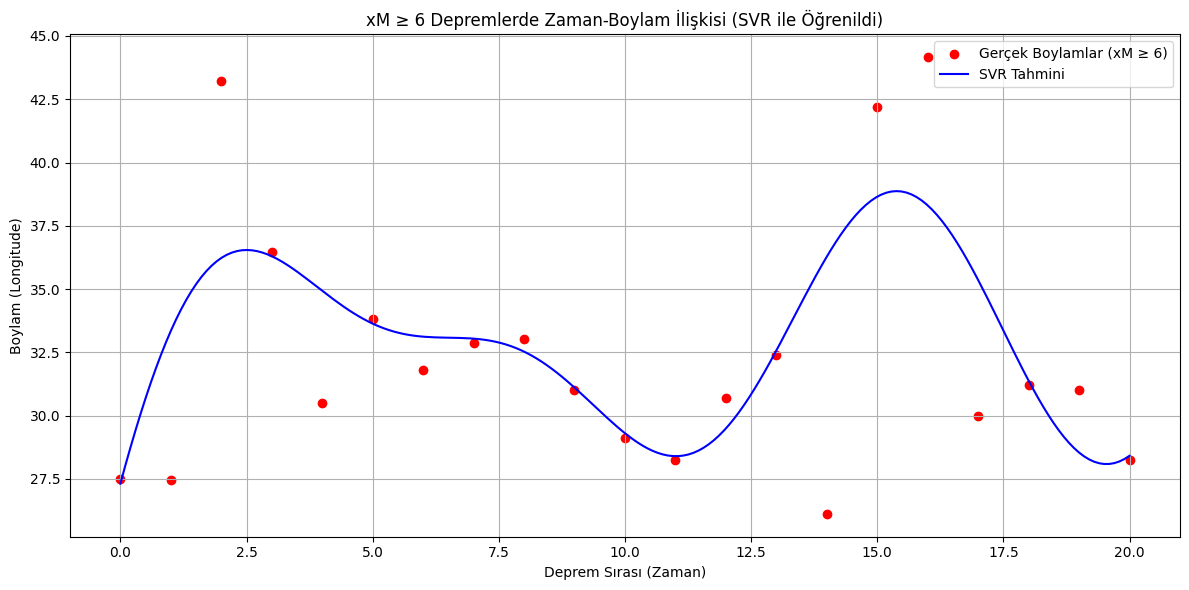

In [45]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='red', label="GerÃ§ek Boylamlar (xM â‰¥ 6)")
plt.plot(X_pred, y_pred, color='blue', label="SVR Tahmini")
plt.title("xM â‰¥ 6 Depremlerde Zaman-Boylam Ä°liÅŸkisi (SVR ile Ã–ÄŸrenildi)")
plt.xlabel("Deprem SÄ±rasÄ± (Zaman)")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## LSTM

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Depremleri sÄ±raya koy (Ã¶nceki adÄ±mlardan)
df["Tarih"] = pd.to_datetime(df["Tarih"], errors="coerce")
df_6plus = df[df["xM"] >= 6.0].dropna(subset=["Tarih", "Boylam"]).sort_values("Tarih").reset_index(drop=True)

# BoylamlarÄ± al
boylam = df_6plus["Boylam"].values.reshape(-1, 1)

# Normalize et
scaler = MinMaxScaler()
boylam_scaled = scaler.fit_transform(boylam)

# Sekans oluÅŸtur (Ã¶rn. 3 zaman penceresi â†’ 1 tahmin)
def create_sequences(data, seq_length=3):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X_seq, y_seq = create_sequences(boylam_scaled, seq_length=3)


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Model
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(X_seq.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# EÄŸitim
history = model.fit(X_seq, y_seq, epochs=200, verbose=0)


In [48]:
# Son 3 boylam verisini al
last_sequence = boylam_scaled[-3:].reshape(1, 3, 1)

# Tahmin
pred_scaled = model.predict(last_sequence)
pred_boylam = scaler.inverse_transform(pred_scaled)

print(f"ðŸ”® Tahmin edilen bir sonraki bÃ¼yÃ¼k depremin boylamÄ± â‰ˆ {pred_boylam[0][0]:.3f}")


1/1 [==============================] - 0s 132ms/step
ðŸ”® Tahmin edilen bir sonraki bÃ¼yÃ¼k depremin boylamÄ± â‰ˆ 32.075


1/1 [==============================] - 0s 16ms/step


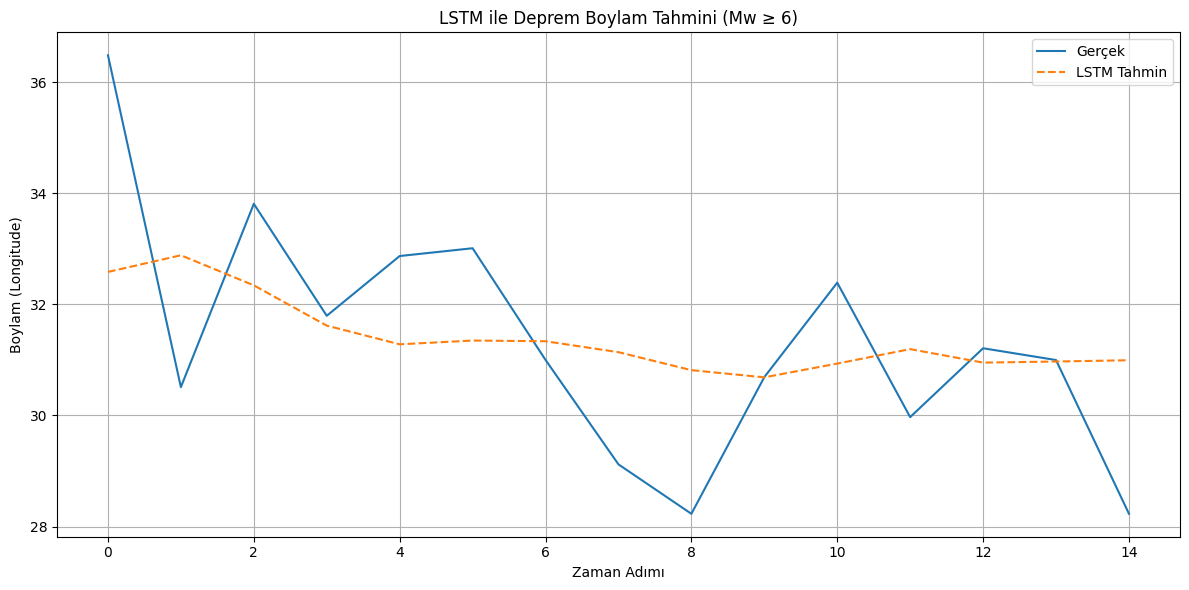

In [38]:
import matplotlib.pyplot as plt

true_vals = scaler.inverse_transform(y_seq)
pred_vals = scaler.inverse_transform(model.predict(X_seq))

plt.figure(figsize=(12,6))
plt.plot(true_vals, label="GerÃ§ek")
plt.plot(pred_vals, label="LSTM Tahmin", linestyle="--")
plt.title("LSTM ile Deprem Boylam Tahmini (Mw â‰¥ 6)")
plt.xlabel("Zaman AdÄ±mÄ±")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# GerÃ§ek ve tahmin (inverselenmiÅŸ)
y_true = scaler.inverse_transform(y_seq)
y_pred_lstm = scaler.inverse_transform(model.predict(X_seq))

mae_lstm = mean_absolute_error(y_true, y_pred_lstm)
rmse = np.sqrt(mean_squared_error(y_true, y_pred_lstm))

print(f"MAE (km cinsinden ~): {mae_lstm * 85:.2f}")
print(f"RMSE (km cinsinden ~): {rmse * 85:.2f}")


1/1 [==============================] - 0s 15ms/step
MAE (km cinsinden ~): 266.18
RMSE (km cinsinden ~): 375.11


In [50]:
future_preds = []
current_input = boylam_scaled[-3:].reshape(1, 3, 1)

for _ in range(3):  # 3 tahmin yap
    next_pred = model.predict(current_input)  # (1, 1)
    
    # Tahmini sakla
    future_preds.append(scaler.inverse_transform(next_pred)[0][0])
    
    # Åžekli (1, 1, 1) olacak ÅŸekilde geniÅŸlet
    next_pred_reshaped = next_pred.reshape(1, 1, 1)
    
    # Yeni input: son 2 + yeni tahmin â†’ (1, 3, 1)
    current_input = np.concatenate([current_input[:, 1:, :], next_pred_reshaped], axis=1)

# Tahminleri gÃ¶ster
for i, val in enumerate(future_preds, 1):
    print(f"ðŸ”® Tahmin {i}. Depremin BoylamÄ± â‰ˆ {val:.3f}Â°E")


1/1 [==============================] - 0s 13ms/step
ðŸ”® Tahmin 1. Depremin BoylamÄ± â‰ˆ 32.075Â°E
ðŸ”® Tahmin 2. Depremin BoylamÄ± â‰ˆ 32.213Â°E
ðŸ”® Tahmin 3. Depremin BoylamÄ± â‰ˆ 32.280Â°E


## SVR

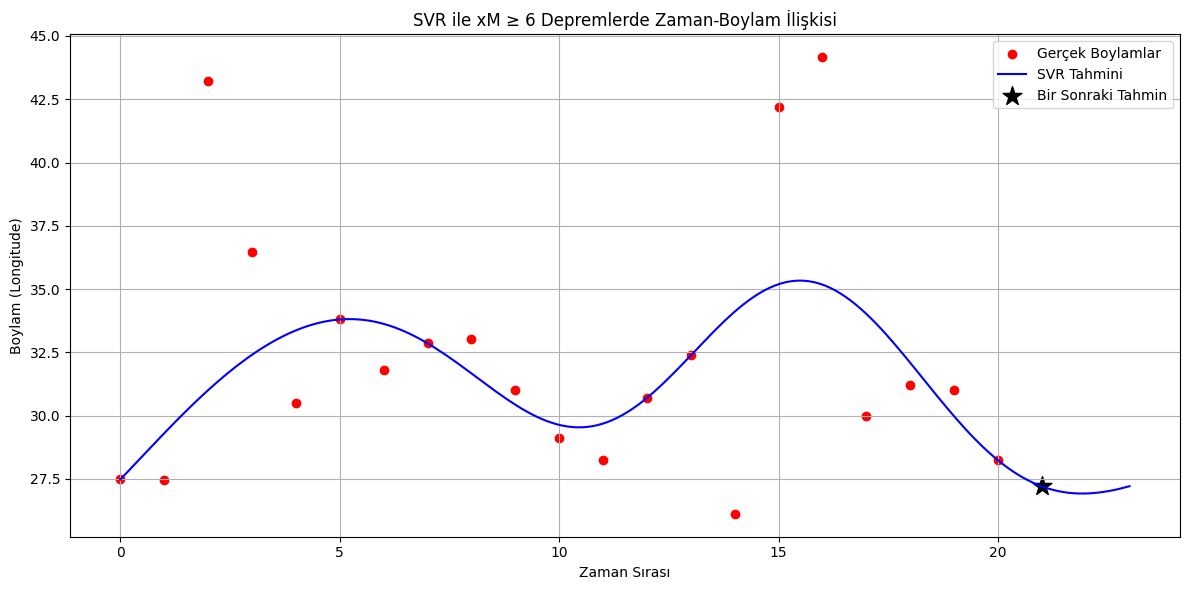

ðŸ”® SVR Tahmini: Bir sonraki bÃ¼yÃ¼k depremin boylamÄ± â‰ˆ 27.208Â°E


In [51]:
from sklearn.svm import SVR

# GiriÅŸ = zaman sÄ±rasÄ± (0,1,2,...)
df_6plus["time_index"] = np.arange(len(df_6plus))
X = df_6plus["time_index"].values.reshape(-1, 1)
y = df_6plus["Boylam"].values

# SVR modeli (RBF kernel)
svr_model = SVR(kernel='rbf', C=100, epsilon=0.01)
svr_model.fit(X, y)

# Tahmin
X_pred = np.linspace(X.min(), X.max()+3, 200).reshape(-1, 1)
y_pred_svr = svr_model.predict(X_pred)

# Son tahmin
next_boylam = svr_model.predict([[X.max() + 1]])[0]

# GÃ¶rsel
plt.figure(figsize=(12,6))
plt.scatter(X, y, color='red', label='GerÃ§ek Boylamlar')
plt.plot(X_pred, y_pred_svr, label='SVR Tahmini', color='blue')
plt.scatter(X.max() + 1, next_boylam, color='black', marker='*', s=200, label='Bir Sonraki Tahmin')
plt.title("SVR ile xM â‰¥ 6 Depremlerde Zaman-Boylam Ä°liÅŸkisi")
plt.xlabel("Zaman SÄ±rasÄ±")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"ðŸ”® SVR Tahmini: Bir sonraki bÃ¼yÃ¼k depremin boylamÄ± â‰ˆ {next_boylam:.3f}Â°E")


In [52]:
# EÄŸitim verisine tahmin uygula
y_pred_train = svr_model.predict(X)

# MAE hesapla
mae_svr = mean_absolute_error(y, y_pred_train)
print(f"ðŸ“‰ SVR MAE â‰ˆ {mae_svr:.3f} derece â‰ˆ {mae_svr*85:.1f} km")

ðŸ“‰ SVR MAE â‰ˆ 2.699 derece â‰ˆ 229.4 km


## RandomForest

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Girdi: sÄ±ralÄ± index
X_rf = df_6plus["time_index"].values.reshape(-1, 1)
y_rf = df_6plus["Boylam"].values


In [54]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_rf, y_rf)


RandomForestRegressor(random_state=42)

In [55]:
X_range = np.linspace(X_rf.min(), X_rf.max()+3, 200).reshape(-1, 1)
y_rfr_pred = rfr.predict(X_range)

next_rfr_pred = rfr.predict([[X_rf.max() + 1]])[0]


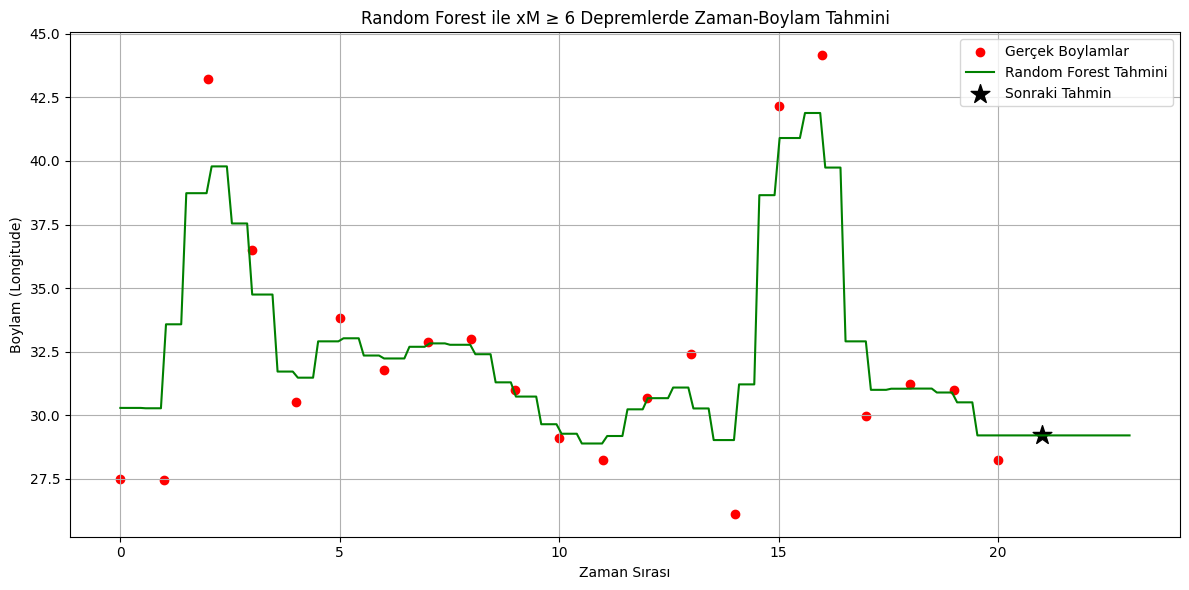

ðŸ”® RFR Tahmini: Bir sonraki bÃ¼yÃ¼k depremin boylamÄ± â‰ˆ 29.204Â°E


In [56]:
plt.figure(figsize=(12,6))
plt.scatter(X_rf, y_rf, color='red', label="GerÃ§ek Boylamlar")
plt.plot(X_range, y_rfr_pred, color='green', label="Random Forest Tahmini")
plt.scatter(X_rf.max() + 1, next_rfr_pred, color='black', marker='*', s=200, label='Sonraki Tahmin')
plt.title("Random Forest ile xM â‰¥ 6 Depremlerde Zaman-Boylam Tahmini")
plt.xlabel("Zaman SÄ±rasÄ±")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"ðŸ”® RFR Tahmini: Bir sonraki bÃ¼yÃ¼k depremin boylamÄ± â‰ˆ {next_rfr_pred:.3f}Â°E")

In [57]:
y_rf_train_pred = rfr.predict(X_rf)
mae_rf = mean_absolute_error(y_rf, y_rf_train_pred)
print(f"RFR MAE â‰ˆ {mae_rf:.3f}Â° â†’ yaklaÅŸÄ±k {mae_rf*85:.1f} km")


RFR MAE â‰ˆ 1.446Â° â†’ yaklaÅŸÄ±k 122.9 km


## XGBoost Regressor

In [58]:
import xgboost as xgb

# Girdi: zaman sÄ±rasÄ±
X_xgb = df_6plus["time_index"].values.reshape(-1, 1)
y_xgb = df_6plus["Boylam"].values

In [59]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_xgb, y_xgb)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [60]:
X_range_xgb = np.linspace(X_xgb.min(), X_xgb.max() + 3, 200).reshape(-1, 1)
y_xgb_pred = xgb_model.predict(X_range_xgb)

next_xgb_pred = xgb_model.predict([[X_xgb.max() + 1]])[0]


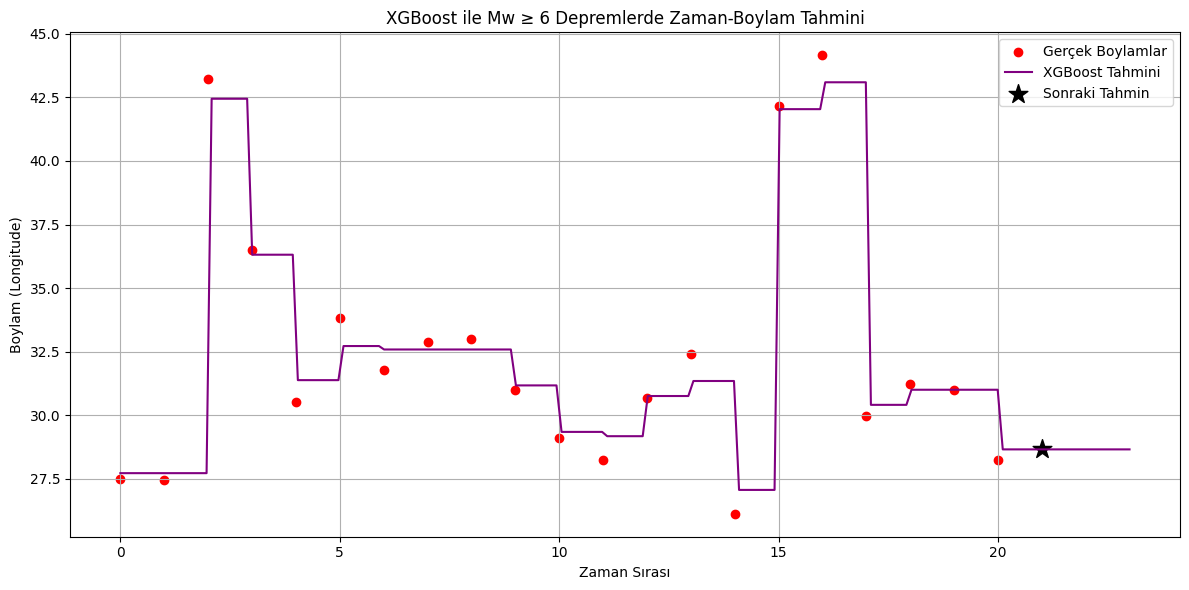

ðŸ”® XGBoost Tahmini: Bir sonraki bÃ¼yÃ¼k depremin boylamÄ± â‰ˆ 28.654Â°E


In [61]:
plt.figure(figsize=(12,6))
plt.scatter(X_xgb, y_xgb, color='red', label="GerÃ§ek Boylamlar")
plt.plot(X_range_xgb, y_xgb_pred, color='purple', label="XGBoost Tahmini")
plt.scatter(X_xgb.max() + 1, next_xgb_pred, color='black', marker='*', s=200, label='Sonraki Tahmin')
plt.title("XGBoost ile Mw â‰¥ 6 Depremlerde Zaman-Boylam Tahmini")
plt.xlabel("Zaman SÄ±rasÄ±")
plt.ylabel("Boylam (Longitude)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"ðŸ”® XGBoost Tahmini: Bir sonraki bÃ¼yÃ¼k depremin boylamÄ± â‰ˆ {next_xgb_pred:.3f}Â°E")

In [62]:
y_train_pred_xgb = xgb_model.predict(X_xgb)
mae_xgb = mean_absolute_error(y_xgb, y_train_pred_xgb)
print(f"XGBoost MAE â‰ˆ {mae_xgb:.3f}Â° â†’ yaklaÅŸÄ±k {mae_xgb*85:.1f} km")


XGBoost MAE â‰ˆ 0.503Â° â†’ yaklaÅŸÄ±k 42.7 km


# Ã‡Ä±ktÄ±lar


In [63]:
# Senin modellerin tarafÄ±ndan tahmin edilen boylamlar
tahminler = {
    "LSTM": y_pred_lstm[-1][0],
    "SVR": y_pred_svr[-1],
    "RFR": y_rfr_pred[-1],
    "XGBoost": y_xgb_pred[-1]
}

# Ortalama tahmin (basit ensemble)
ortalama_boylam = sum(tahminler.values()) / len(tahminler)

print(f"ðŸ”® Ensemble (Model OrtalamasÄ±) Tahmin BoylamÄ±: {ortalama_boylam:.3f}Â°E")


ðŸ”® Ensemble (Model OrtalamasÄ±) Tahmin BoylamÄ±: 29.322Â°E


In [64]:
# MAE deÄŸerleri
mae = {
    "LSTM": mae_lstm,
    "SVR": mae_svr,
    "RFR": mae_rf,
    "XGBoost": mae_xgb
}

# AÄŸÄ±rlÄ±klarÄ± hesapla: ters MAE (hata kÃ¼Ã§Ã¼kse aÄŸÄ±rlÄ±k bÃ¼yÃ¼k)
weights = {k: 1/v for k, v in mae.items()}

# Normalize et
total_weight = sum(weights.values())
weights = {k: w / total_weight for k, w in weights.items()}

# AÄŸÄ±rlÄ±klÄ± ortalama
weighted_mean = sum(tahminler[k] * weights[k] for k in tahminler)

print(f"ðŸ“Š AÄŸÄ±rlÄ±klÄ± Ensemble Tahmini: {weighted_mean:.3f}Â°E")

ðŸ“Š AÄŸÄ±rlÄ±klÄ± Ensemble Tahmini: 28.946Â°E


In [65]:
# NumPy ile hesapla
tahmin_arr = np.array(list(tahminler.values()))
mean = tahmin_arr.mean()
std = tahmin_arr.std()

print(f"ðŸ“ˆ OlasÄ±lÄ±ksal AralÄ±k (Â±1 std): {mean:.3f}Â°E Â± {std:.3f}")
print(f"â†’ Muhtemel AralÄ±k: [{mean-std:.3f}Â°, {mean+std:.3f}Â°]")


ðŸ“ˆ OlasÄ±lÄ±ksal AralÄ±k (Â±1 std): 29.322Â°E Â± 1.822
â†’ Muhtemel AralÄ±k: [27.499Â°, 31.144Â°]


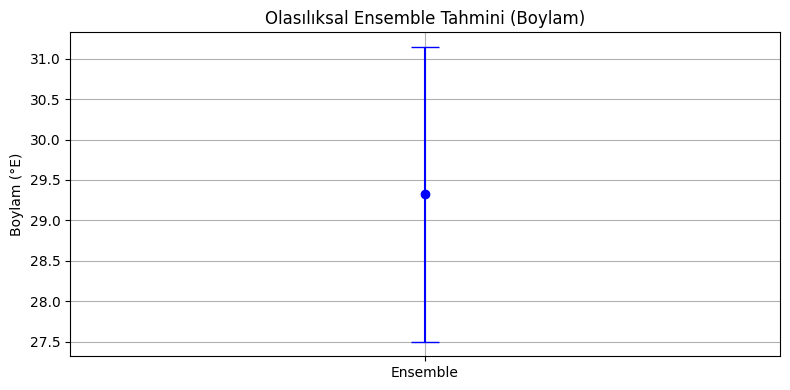

In [66]:
plt.figure(figsize=(8, 4))
plt.errorbar(["Ensemble"], [mean], yerr=[std], fmt='o', color='blue', capsize=10)
plt.title("OlasÄ±lÄ±ksal Ensemble Tahmini (Boylam)")
plt.ylabel("Boylam (Â°E)")
plt.grid(True)
plt.tight_layout()
plt.show()